Assignment 1 - Nathan Brown

Question 1 - Data Preprocessing - Part A

The dataset has several fields with missing data. Choose a method to deal with missing data and justify your choice [2 marks].

Step one is to just explore the data and to make simple observations about it, this starts with loading in the data and looking inside of it using pandas.

In [1]:
import pandas as pd 
import numpy as np
#Will convert '?' to NaN as well
claim_data = pd.read_csv('./data/train.csv', encoding= 'unicode_escape', na_values='?')
claim_data.describe()

,Row_ID,Household_ID,Vehicle,Calendar_Year,Model_Year,OrdCat,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,NVVar1,NVVar2,NVVar3,NVVar4,Claim_Amount
count,3.000000e+04,3.000000e+04,30000.000000,30000.000000,30000.000000,29981.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,5.265666e+06,3.415164e+06,1.869133,2006.118667,1999.505933,3.575798,-0.006781,-0.063997,-0.025057,-0.053640,0.012070,-0.044910,-0.024929,-0.064832,0.032385,0.071626,0.078748,0.041319,54.862481
std,3.034083e+06,1.942246e+06,1.150848,0.804947,5.048889,1.159251,0.976902,0.960495,1.016570,0.959304,0.986830,0.971651,1.000754,0.979235,1.063700,1.148950,1.144502,1.073275,244.230985
min,1.160000e+03,6.830000e+02,1.000000,2005.000000,1981.000000,1.000000,-2.578222,-2.441519,-2.744055,-2.457475,-3.350344,-2.300626,-2.262411,-1.882994,-0.231530,-0.266117,-0.272337,-0.251419,0.000000
25%,2.670346e+06,1.917093e+06,1.000000,2005.000000,1997.000000,2.000000,-0.665897,-0.816152,-0.869687,-0.783019,-0.662235,-0.688765,-0.898486,-0.646298,-0.231530,-0.266117,-0.272337,-0.251419,0.000000
50%,5.255290e+06,3.654160e+06,2.000000,2006.000000,2000.000000,4.000000,-0.320393,-0.124506,-0.221758,-0.106471,-0.115098,-0.241936,-0.468419,-0.269656,-0.231530,-0.266117,-0.272337,-0.251419,0.000000
75%,7.858568e+06,4.992703e+06,2.000000,2007.000000,2003.000000,4.000000,0.442930,0.480684,0.726996,0.485509,0.550982,0.500830,0.870931,0.327962,-0.231530,-0.266117,-0.272337,-0.251419,5.905321
max,1.051789e+07,6.484624e+06,17.000000,2007.000000,2008.000000,7.000000,4.540768,6.307799,5.563325,6.100857,3.869488,4.584289,4.127148,33.457737,6.627110,8.883081,8.691144,6.388802,11440.750000


In [2]:
for col in ['Row_ID', 'Household_ID', 'Vehicle', 'Calendar_Year', 'Model_Year']:
    claim_data[col] = claim_data[col].astype('float64')
claim_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row_ID          30000 non-null  float64
 1   Household_ID    30000 non-null  float64
 2   Vehicle         30000 non-null  float64
 3   Calendar_Year   30000 non-null  float64
 4   Model_Year      30000 non-null  float64
 5   Blind_Make      29985 non-null  object 
 6   Blind_Model     29985 non-null  object 
 7   Blind_Submodel  29985 non-null  object 
 8   Cat1            29950 non-null  object 
 9   Cat2            19409 non-null  object 
 10  Cat3            29989 non-null  object 
 11  Cat4            17015 non-null  object 
 12  Cat5            17002 non-null  object 
 13  Cat6            29950 non-null  object 
 14  Cat7            13520 non-null  object 
 15  Cat8            29998 non-null  object 
 16  Cat9            30000 non-null  object 
 17  Cat10           29990 non-null 

In [3]:
claim_data.sample(5)

,Row_ID,Household_ID,Vehicle,Calendar_Year,Model_Year,Blind_Make,Blind_Model,Blind_Submodel,Cat1,Cat2,...,Var5,Var6,Var7,Var8,NVCat,NVVar1,NVVar2,NVVar3,NVVar4,Claim_Amount
29174,1476518.0,848179.0,1.0,2007.0,2001.0,Y,Y.32,Y.32.0,B,C,...,0.580718,-0.300421,-0.972211,-0.309366,O,-0.23153,-0.266117,-0.272337,-0.251419,17.962280
6400,2566090.0,1878410.0,3.0,2007.0,2000.0,BH,BH.18,BH.18.5,B,C,...,-0.198358,-0.714499,-0.861623,-0.559111,O,-0.23153,-0.266117,-0.272337,-0.251419,8.513937
26074,8416163.0,5475561.0,2.0,2007.0,1998.0,AU,AU.54,AU.54.2,G,NaN,...,-0.073468,0.473927,0.354851,0.021441,M,-0.23153,-0.266117,-0.272337,-0.251419,0.000000
17934,9940541.0,6296841.0,1.0,2007.0,1998.0,AJ,AJ.14,AJ.14.3,H,NaN,...,1.234903,1.243596,2.210280,-0.397428,O,-0.23153,-0.266117,-0.272337,-0.251419,0.000000
1857,6469166.0,4206858.0,1.0,2007.0,2005.0,AF,AF.24,AF.24.5,A,C,...,-0.436244,-0.106249,-0.738747,1.021956,B,-0.23153,-0.266117,-0.272337,4.175396,0.000000


From studying the data the first thing needed is a method to deal with the missing data in the categorical data. All other data seems consistent.

In [4]:
#First count how many NaN we have in the categorical data points, print out (col_name,amount,data count,%)
def count_nulls():
    count_null_array = []
    row_count = claim_data.shape[0]
    for i in range(1,13):
        cat_string = "Cat" + str(i)
        output = claim_data[cat_string].isnull().sum()
        count_null_array.append(("Cat" + str(i), output, row_count, round((output/row_count)*100,2)))
    #Do the named ones
    output = claim_data["OrdCat"].isnull().sum()
    count_null_array.append(("OrdCat",output, row_count, round((output/row_count)*100,2)))

    output = claim_data["NVCat"].isnull().sum()
    count_null_array.append(("NVCat", output, row_count, round((output/row_count)*100,2)))
    return count_null_array
count_nulls()

[('Cat1', 50, 30000, 0.17),
 ('Cat2', 10591, 30000, 35.3),
 ('Cat3', 11, 30000, 0.04),
 ('Cat4', 12985, 30000, 43.28),
 ('Cat5', 12998, 30000, 43.33),
 ('Cat6', 50, 30000, 0.17),
 ('Cat7', 16480, 30000, 54.93),
 ('Cat8', 2, 30000, 0.01),
 ('Cat9', 0, 30000, 0.0),
 ('Cat10', 10, 30000, 0.03),
 ('Cat11', 58, 30000, 0.19),
 ('Cat12', 52, 30000, 0.17),
 ('OrdCat', 19, 30000, 0.06),
 ('NVCat', 0, 30000, 0.0)]

Here we can see two major different types of missing data. We have Cat1,3,6,8,10,11,12,OrdCat with very little data missing opposed to Cat2,4,5,7 with lots missing. This means it maybe appropite to deal with these two types of missing data in seperate ways. For the values with little missing data I am simply going to remove the data from the dataset. While I could maybe impute using a most common method or another I think just removing dirty data is better when it is so small. In a worse case where none of the missing data overlaps at most I will lose 252 rows of data, so less than 1%. I do not believe this will affect the training data enough to justify the imputation. Imputation is really only a best guess and is sub optimal for data. The columns with no missing values will obviously have nothing done to them. Below I will remove the rows with ? in the data for these columns. It is also worth noting that the model classes have 15 rows missing.

In [5]:
#Remove the row if a ? is in the selected column, also add in the model with missing numbers
columns_to_remove = ["Cat1","Cat3","Cat6","Cat8","Cat10","Cat11","Cat12","OrdCat","Blind_Make","Blind_Model","Blind_Submodel"]
claim_data = claim_data.dropna(subset=columns_to_remove)
claim_data = claim_data.reset_index(drop=True)
print(claim_data)
count_nulls()


           Row_ID  Household_ID  Vehicle  Calendar_Year  Model_Year  \
0       2718481.0     1933325.0      3.0         2006.0      1997.0   
1       6717427.0     4297298.0      1.0         2006.0      1997.0   
2       7218252.0     4708245.0      1.0         2006.0      2000.0   
3       8048505.0     5136981.0      7.0         2007.0      2003.0   
4       3209482.0     2151306.0      5.0         2006.0      2001.0   
...           ...           ...      ...            ...         ...   
29830  10424872.0     6456045.0      2.0         2007.0      2000.0   
29831   6304361.0     4152505.0      4.0         2007.0      2002.0   
29832    895720.0      596804.0      1.0         2005.0      1991.0   
29833   3426228.0     2247109.0      1.0         2005.0      1992.0   
29834   7357807.0     4773632.0      1.0         2006.0      1997.0   

      Blind_Make Blind_Model Blind_Submodel Cat1 Cat2  ...      Var5  \
0              R        R.20         R.20.6    B  NaN  ... -1.054747   
1  

[('Cat1', 0, 29835, 0.0),
 ('Cat2', 10510, 29835, 35.23),
 ('Cat3', 0, 29835, 0.0),
 ('Cat4', 12905, 29835, 43.25),
 ('Cat5', 12918, 29835, 43.3),
 ('Cat6', 0, 29835, 0.0),
 ('Cat7', 16376, 29835, 54.89),
 ('Cat8', 0, 29835, 0.0),
 ('Cat9', 0, 29835, 0.0),
 ('Cat10', 0, 29835, 0.0),
 ('Cat11', 0, 29835, 0.0),
 ('Cat12', 0, 29835, 0.0),
 ('OrdCat', 0, 29835, 0.0),
 ('NVCat', 0, 29835, 0.0)]

As you can now see there has been 165 rows lost, however we now have most columns with no missing data. A small price to pay for this much cleaner data. Looking at the classes with lots of missing data, I'd like to explore what is missing and see what the columns could have been. To do this I will do a value count again but print in full

In [6]:
columns_to_inv = ["Cat2", "Cat4", "Cat5", "Cat7"]
for inv_str in columns_to_inv:
    print(inv_str)
    print(claim_data[inv_str].value_counts(ascending=True))

Cat2
B      555
A     5188
C    13582
Name: Cat2, dtype: int64
Cat4
B      850
C     3255
A    12825
Name: Cat4, dtype: int64
Cat5
B      163
C     1617
A    15137
Name: Cat5, dtype: int64
Cat7
D      274
B      491
A     2184
C    10510
Name: Cat7, dtype: int64


The data here shows that each one with missing data has a very obvious most common answer. All have a large modal favourite in the feature, such as C in Cat7. This makes them a candidate for modal imputation. Another method is to use a KNN classifier to impute these missing values. This method is more effective as it considers the correlation between other types of features to predict the most likely choice for the variable. This does make the assumption that the missing values are dependent on the others however, but no method to solve this is perfect. 

In [7]:
#Confirm we have NA data
print(claim_data.isna().sum().sum())
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

#Generate our one hot encoding in the dataframe
cat_variables = claim_data[["Cat1","Cat2","Cat3","Cat4","Cat5","Cat6","Cat7","Cat8","Cat9","Cat10","Cat11","Cat12","OrdCat","NVCat"]]
cat_dummies = pd.get_dummies(cat_variables)

claim_data_ohe = pd.concat([claim_data.drop(cat_variables, axis=1), cat_dummies], axis=1)

scaler = MinMaxScaler()
#Too much data to onehotencode and package issues stopped me from hashing these - Not ideal but has to be done
#Also remove the target variable
claim_data_ohe = claim_data_ohe.drop(["Blind_Make","Blind_Model", "Blind_Submodel", "Claim_Amount"], axis=1)

#Normalise the data to between 0 and 1
claim_data_ohe = pd.DataFrame(scaler.fit_transform(claim_data_ohe), columns= claim_data_ohe.columns)

#Find with KNN
imputer = KNNImputer(n_neighbors=7)

claim_data_imputed = pd.DataFrame(imputer.fit_transform(claim_data_ohe), columns= claim_data_ohe.columns)

#Reverse one hot encoding
for cat in columns_to_inv:
    new_column = pd.DataFrame(claim_data_imputed.filter(regex="^" + cat + "_").idxmax(axis=1), columns=[cat])
    regex_string = cat + "_"
    claim_data[cat] = new_column[cat].str.replace(regex_string,'')
#Confirm we have no nulls left in our dataset
claim_data.isnull().sum().sum()

52709


0

claim_data is now a full dataset with no null entries. We have lost around 166 entries and imputed the rest that were null using a KNN classifier. The code above changes the data into OneHotEncoded in the dataframe, then normalises the data between 0 and 1 to allow the algorithm to work. It uses the nan_euclidian method given by scipy to best estimate what the guess should be for the missing value. The code then adds the updated values to the dataset and resets the other preprocessing work done so we can select better methods for our later algorithms. Below we can now repeat our earlier value counts to see how the classifier has changed them.

In [8]:
for inv_str in columns_to_inv:
    print(inv_str)
    print(claim_data[inv_str].value_counts(ascending=True))

Cat2
B      555
C    13582
A    15698
Name: Cat2, dtype: int64
Cat4
B      850
C     3255
A    25730
Name: Cat4, dtype: int64
Cat5
B      163
C     1617
A    28055
Name: Cat5, dtype: int64
Cat7
D      274
B      491
C    10510
A    18560
Name: Cat7, dtype: int64


For Cat4 and Cat 6 it has just always selected the modal answer, however Cat2 and Cat7 have provided a split between the variables. These are hopefully more accurate representations of what would have been there if the data was captured.

Question 1 - Data Preprocessing - Part B

Convert categorical values to a suitable representation. Notice that there are many categorical variables in the dataset. If you use all the categorical variables you will end up with a large feature space. Feel free to ignore categorical variables that will increase your feature space considerably but use at least five categorical variables [2 marks].

For dealing with the categorical data I have decided on using OneHotEncoding for it. I will not include the ordered categories in this list as they have a natural ordering to them and are already numerical. I will also choose to totally ignore and drop the Blind_Model and Blind_Submodel. These are such variable data points and the model will likely not have seen the data ever before when a new claim is made due to the variety in these subsets. I will keep the make in as these are slightly less varied. This will create a very large matrix of possiblitys but it shouldn't cause any issues. For my numerical data I will use normilisation. This will work well due to the means being around 0 already and a standard deviation of 1 in place which the standard scaler in the lab class did. 

Below I will create a column transformer to call later on the data that will do all of this work

In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Normalizer
from sklearn.compose import ColumnTransformer

attributes_num = ["Var1", "Var2","Var3","Var4","Var5","Var6","Var7","Var8","NVVar1","NVVar2","NVVar3","NVVar4"]
attributes_cat = ["Blind_Make", "Cat1","Cat2","Cat3","Cat4","Cat5","Cat6","Cat7","Cat8","Cat9","Cat10","Cat11","Cat12","NVCat"]
attributes_other = ["Household_ID", "Vehicle", "Calendar_Year", "Model_Year", "OrdCat"]

#Below I drop some columns, these are used in the actual transformer as opposed to all the columns which are above
attributes_num_used = ["Var1", "Var2","Var3","Var4","Var5","Var6","Var7","Var8","NVVar1","NVVar2","NVVar3","NVVar4"]
attributes_cat_used = ["Cat1","Cat3","Cat5","Cat6","Cat7","Cat8","Cat9","NVCat"]

full_transform = ColumnTransformer([
    ("num", Normalizer(), attributes_num_used),
    ("cat", OneHotEncoder(), attributes_cat_used),
])

#Transformer without numerical for the tree models
tree_transformer = ColumnTransformer([
    ("cat", OneHotEncoder(), attributes_cat_used)
],remainder='passthrough')

#Drop these pieces of data, they are not needed
claim_data = claim_data.drop(["Blind_Model", "Blind_Submodel"], axis=1)

Question 1 - Data Preprocessing - Part C

The data is highly imbalanced: more records contain zero claims than not.  When designing your predictive model, you need to account for this [3 marks].

Lets first of all observe the data imbalance by a simple bar chart comparing the two types of target variable, 0 claim and < 0 claim.

20877
8958


<BarContainer object of 2 artists>

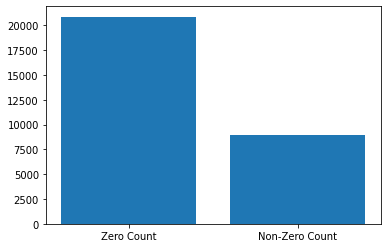

In [10]:
%matplotlib inline 
import matplotlib.pyplot as plt
zero_count = claim_data[(claim_data["Claim_Amount"] == 0)].count()[0]
non_zero_count = claim_data[claim_data["Claim_Amount" ] > 0].count()[0]
print(zero_count)
print(non_zero_count)
plt.bar(["Zero Count", "Non-Zero Count"], [zero_count, non_zero_count])

There is 11919 more zero claim pieces of data within the dataset. This is roughly double the amount of non zero claims and this will create a bias in the dataset. This would make there be less chance of correctly predicting when there should be a claim value. I am going to implement undersampiling on the data to try and address this balance down to a reasonable level. I am going to reduce the gap between the two down to an 80% ratio between the two classes. This will leave the current dataset to around 16000 samples still which is over half and still more than enough to work with for effective results. Below I will create a function to call my sampaling technique on, but I will not use it on the data set until I seperate out the data in the next section for this reason.

In [11]:
from imblearn.under_sampling import RandomUnderSampler
#Take in features and labels, return under sampled labels
def sampler(features):
    #First of all make the continous data binary
    undersample = RandomUnderSampler(sampling_strategy=0.8)
    features, y = undersample.fit_resample(features,features["Binary"])
    #Shuffle the features so they are mixed
    features = features.sample(frac=1).reset_index(drop=True)
    return features

Question 1 - Data Preprocessing - Additional Steps - Feature Selection

In this step I will investigate which features to use in the model and which ones I beleive can be dropped. I have already removed some variables such as Blind_Model/Sub_Model due to the variation in the categories. Using a spearman correlation between variables I will generate my own correlation matrix.

In [12]:
from scipy import stats
from operator import itemgetter
corr_matrix = []
for feature in attributes_cat:
    corr_matrix.append((feature, stats.spearmanr(claim_data[feature], claim_data["Claim_Amount"])[0]))
for feature in attributes_num:
    corr_matrix.append((feature, stats.spearmanr(claim_data[feature], claim_data["Claim_Amount"])[0]))
for feature in attributes_other:
    corr_matrix.append((feature, stats.spearmanr(claim_data[feature], claim_data["Claim_Amount"])[0]))
sorted(corr_matrix,key=itemgetter(1))

[('Cat3', -0.04790492131918909),
 ('Cat6', -0.029224793349666923),
 ('Var6', -0.028089961538438533),
 ('Var2', -0.02581927135385686),
 ('Var3', -0.025584777184900275),
 ('Cat5', -0.025571210789607796),
 ('OrdCat', -0.02402822908539657),
 ('Var7', -0.023721559865740045),
 ('Var1', -0.02231187838834493),
 ('NVCat', -0.022172909145313884),
 ('Var4', -0.02164389398293612),
 ('Cat1', -0.01986258472283148),
 ('Cat8', -0.01788243275623102),
 ('Var8', -0.015325498609193241),
 ('Var5', -0.011650895649837257),
 ('Cat2', -0.008279476102650968),
 ('Calendar_Year', -0.0070099969964738645),
 ('Household_ID', -0.006542315689061522),
 ('Cat4', -0.0031628205153692544),
 ('Model_Year', -0.0025113220633293247),
 ('Blind_Make', -0.00141182169136917),
 ('Cat11', -0.0002897867019988965),
 ('Cat10', 0.00024213641111735145),
 ('Vehicle', 0.005314862327437765),
 ('Cat12', 0.005502589727205273),
 ('NVVar4', 0.01820662879434113),
 ('NVVar1', 0.025784925890525546),
 ('Cat7', 0.029546734554520282),
 ('Cat9', 0.031

The correlation here is showing there to be very little correlation between all the features and predicting the claim amount. The closer to 0 the more independent the variable and the less it should help the model. I have decided to cut anything between the values of +/- 0.01. This means the feature list I will use is as follows. I am left with 21 features and the target variable of Claim_Amount.

In [13]:
claim_data_selected = claim_data.drop(["Row_ID","Cat12", "Vehicle", "Cat10", "Cat11", "Blind_Make", "Model_Year","Cat4","Household_ID", "Calendar_Year", "Cat2"], axis=1)
claim_data_selected

,Cat1,Cat3,Cat5,Cat6,Cat7,Cat8,Cat9,OrdCat,Var1,Var2,...,Var5,Var6,Var7,Var8,NVCat,NVVar1,NVVar2,NVVar3,NVVar4,Claim_Amount
0,B,A,A,C,C,B,B,2.0,-1.172101,-1.248430,...,-1.054747,-1.164837,-0.812472,-0.581756,N,-0.23153,-0.266117,2.715490,-0.251419,104.597500
1,F,A,A,C,D,A,B,2.0,-0.641792,-0.643240,...,-1.149901,-1.299354,-1.193388,-1.323992,N,-0.23153,2.783616,-0.272337,-0.251419,0.000000
2,B,A,A,C,C,B,B,2.0,-0.770352,-1.507798,...,-0.775231,-1.467792,-0.947636,-0.914860,F,-0.23153,-0.266117,-0.272337,-0.251419,0.000000
3,B,A,A,C,C,A,B,2.0,-0.698037,1.448988,...,-0.751442,-0.378792,-0.689596,0.730640,M,-0.23153,-0.266117,-0.272337,-0.251419,0.000000
4,I,B,A,D,A,B,B,5.0,0.322405,1.691064,...,0.461775,1.451805,1.411586,0.977104,B,-0.23153,-0.266117,-0.272337,-0.251419,0.615937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29830,D,A,A,C,A,A,B,5.0,1.519617,0.826507,...,1.425212,0.907890,0.711192,0.194939,M,-0.23153,-0.266117,-0.272337,-0.251419,0.000000
29831,F,A,A,C,A,B,B,2.0,-0.633757,-0.643240,...,-0.608711,-1.134425,-1.193388,-0.844848,L,-0.23153,-0.266117,4.209404,-0.251419,135.602700
29832,B,E,A,B,C,A,B,4.0,-0.481093,-0.816152,...,-0.162675,-0.597528,-1.058225,-0.728890,N,-0.23153,-0.266117,2.715490,-0.251419,42.755250
29833,B,E,A,B,C,A,B,4.0,-0.481093,-0.989063,...,0.051422,-0.578812,-1.058225,-0.656034,M,-0.23153,-0.266117,-0.272337,-0.251419,0.000000


Question 2 - Peformance Using a single model - Linear Regression

All worth [2 marks].

For each model, use grid search with at least three options for each parameter and clearly report the performance measure over a validation set.


First I am going to create a lot of variables that will be needed for the next few questions. I have chose to do that all here to keep it as central as possible. Hopefully my comments will make it clear what each thing is doing. I will then use the classifier listed in each question and then compare at the end. The MSE should be stated once the model is done.

8910
7128
The MSE for Linear Regression is 49089.68171262561


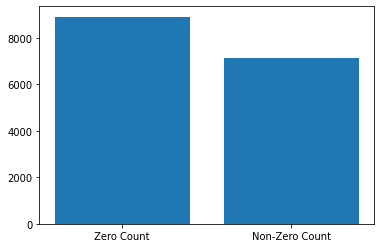

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_squared_error

#First of all I need to take the data and change it to have a class name, instead of continous, this will help for sampling and classifier later, 1 is greater than 0
claim_data_selected["Binary"] = np.where(claim_data_selected["Claim_Amount"] > 0, 1,0) 

#Then split the data to have a test set that I can use when I have my ideal model
claim_data_train, claim_data_test = train_test_split(claim_data_selected, test_size=0.2, random_state=47)

#Then I need to create a validation set for my training data
claim_data_train2, claim_data_valid = train_test_split(claim_data_train, test_size=0.2, random_state=47)

#I do everything twice here, which could be negated with h and vstack, but I work better this way personally
#I am fist going to undersample the data
claim_data_train_under = sampler(claim_data_train)
claim_data_train2_under = sampler(claim_data_train2)

#Create variables for later use before the drop
claim_data_test_bin = claim_data_test
claim_data_valid_bin = claim_data_valid
claim_data_train_under_bin = claim_data_train_under
claim_data_train2_under_bin = claim_data_train2_under

#Drop some values for there use later in the classifier
claim_data_train_under_bin = claim_data_train_under_bin.drop(["Claim_Amount"], axis = 1)
claim_data_train2_under_bin = claim_data_train2_under_bin.drop(["Claim_Amount"], axis = 1)
claim_data_test_bin = claim_data_test_bin.drop(["Claim_Amount"], axis = 1)
claim_data_valid_bin = claim_data_valid_bin.drop(["Claim_Amount"], axis = 1)

#Drop the added columns going forwards as they are only needed in classifcation
claim_data_train_under = claim_data_train_under.drop(["Binary"], axis = 1)
claim_data_train2_under = claim_data_train2_under.drop(["Binary"], axis = 1)
claim_data_test = claim_data_test.drop(["Binary"], axis = 1)
claim_data_valid = claim_data_valid.drop(["Binary"], axis = 1)

#Check it worked 
%matplotlib inline 
import matplotlib.pyplot as plt
zero_count = claim_data_train_under[(claim_data_train_under["Claim_Amount"] == 0)].count()[0]
non_zero_count = claim_data_train_under[claim_data_train_under["Claim_Amount" ] > 0].count()[0]
print(zero_count)
print(non_zero_count)
plt.bar(["Zero Count", "Non-Zero Count"], [zero_count, non_zero_count])

#Create the training sets with just 0 values in them
claim_data_train_under_nonzero = claim_data_train_under[claim_data_train_under["Claim_Amount"] > 0]
claim_data_train2_under_nonzero = claim_data_train2_under[claim_data_train2_under["Claim_Amount"] > 0]

#I now need to split the data into features and labels now it is sampled, first full train and test sets
claim_data_train_under_features = claim_data_train_under.drop(["Claim_Amount"], axis=1)
claim_data_train_under_labels = pd.DataFrame(claim_data_train_under["Claim_Amount"])
claim_data_test_features = claim_data_test.drop(["Claim_Amount"], axis=1)
claim_data_test_labels = pd.DataFrame(claim_data_test["Claim_Amount"])

#Now do my train2 and validation split
claim_data_train2_under_features = claim_data_train2_under.drop(["Claim_Amount"], axis=1)
claim_data_train2_under_labels = pd.DataFrame(claim_data_train2_under["Claim_Amount"])
claim_data_valid_features = claim_data_valid.drop(["Claim_Amount"], axis=1)
claim_data_valid_labels = pd.DataFrame(claim_data_valid["Claim_Amount"])

#I now need to perform the data pre processing above and change the data over using my column transformer.
claim_data_train_under_features_transformed = tree_transformer.fit_transform(claim_data_train_under_features)
claim_data_test_features_transformed = tree_transformer.transform(claim_data_test_features)
claim_data_train2_under_features_transformed = full_transform.fit_transform(claim_data_train2_under_features)
claim_data_valid_features_transformed = full_transform.transform(claim_data_valid_features)

#Now I will peform a grid search with these features
lr = LinearRegression()
#parameters = dict(fit_intercept = ['True', 'False'])
#grid = GridSearchCV(lr, param_grid=parameters, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
#grid.fit(claim_data_train2_under_features_transformed, claim_data_train2_under_labels)

lr_best = {'fit_intercept': 'True'}

#Set the optimal model hyper params
lr.set_params(**lr_best)

#Fit the model with the training data
lr.fit(claim_data_train2_under_features_transformed, claim_data_train2_under_labels)

#Predict on the validation set
pred = lr.predict(claim_data_valid_features_transformed)

#Work out the MSE
error = mean_squared_error(claim_data_valid_labels, pred)
print("The MSE for Linear Regression is",error)

Question 2 - Peformance Using a single model - Ridge Regression

In [15]:
#Use the variables we created above now the data is fully ready and transformed
from sklearn.linear_model import Ridge
ridge = Ridge()
#First set up the grid search again
#parameters = dict(fit_intercept = ['True', 'False'], alpha = [20,10,5,1,0.1,0.01,0.001,0.0001,0], solver = ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'])
#grid = GridSearchCV(ridge, param_grid=parameters, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
#grid.fit(claim_data_train2_under_features_transformed, claim_data_train2_under_labels)

#The best params from the grid search
ridge_best = {'alpha': 20, 'fit_intercept': 'False', 'solver': 'saga'}

#Set the best params
ridge.set_params(**ridge_best)

#fit the model
ridge.fit(claim_data_train2_under_features_transformed, claim_data_train2_under_labels)

#Predict on the validation set
pred = ridge.predict(claim_data_valid_features_transformed)

#Work out the MSE
error = mean_squared_error(claim_data_valid_labels, pred)
print("The MSE for Ridge Regression is",error)

The MSE for Ridge Regression is 49045.32999909534


Question 2 - Peformance Using a single model - Random Forests Regression

In [16]:
from sklearn.ensemble import RandomForestRegressor
#We now need to appy a different transformer as the numerical data does not need it
claim_data_train2_under_features_tree_transformed = tree_transformer.fit_transform(claim_data_train2_under_features)
claim_data_valid_features_tree_transformed = tree_transformer.transform(claim_data_valid_features)

rf = RandomForestRegressor()

#Grid search
#parameters = dict(n_estimators = [20, 50, 100, 200], max_samples = [None,500, 1500, 3000], max_depth=[None,3,5,7,9])
#grid = GridSearchCV(rf, param_grid=parameters, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
#grid.fit(claim_data_train2_under_features_tree_transformed, claim_data_train2_under_labels)

rf_best = {'max_depth': 3, 'max_samples': None, 'n_estimators': 200}

#Set the best params
rf.set_params(**rf_best)

#fit the model
rf.fit(claim_data_train2_under_features_tree_transformed, claim_data_train2_under_labels)

#Predict on the validation set
pred = rf.predict(claim_data_valid_features_tree_transformed)

#Work out the MSE
error = mean_squared_error(claim_data_valid_labels, pred)
print("The MSE for Random Forest Regression is",error)

The MSE for Random Forest Regression is 49053.162065855315


Question 2 - Peformance Using a single model - Gradient Tree Boosting Regression

In [17]:
## import GradientBoostingRegressor package
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()

#Grid search
#parameters = dict(n_estimators = [20, 50, 100, 200], max_features = ['auto', 'sqrt','log2'] ,max_depth=[3,5,7,9], learning_rate = [0.1,0.01,0.25,0.5])
#grid = GridSearchCV(gbr, param_grid=parameters, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
#grid.fit(claim_data_train2_under_features_tree_transformed, claim_data_train2_under_labels)

gbr_best = {'learning_rate': 0.01, 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 100}

#Set the best params
gbr.set_params(**gbr_best)

#fit the model
gbr.fit(claim_data_train2_under_features_tree_transformed, claim_data_train2_under_labels)

#Predict on the validation set
pred = gbr.predict(claim_data_valid_features_tree_transformed)

#Work out the MSE
error = mean_squared_error(claim_data_valid_labels, pred)
print("The MSE for Gradient Boosting Regression is",error)

The MSE for Gradient Boosting Regression is 48737.06859474875


The above runs have shown Gradient Boosting to pedict with the lowest MSE on our validation set, showing that this is the ideal single model. The other thing to note is the outperfomance of Ridge Regression on Linear, with that being the highest non tree regressor. In future runs using a single model I will use GBR as my model.

Question 3 - Performance Using A Combination of Two Models - Part A

The first model will be a binary classifier that will tell whether the claim was zero or different from zero. Compare the following classifiers: random forests for classification and gradient boosting for classification [3 marks].

First I will create a classifier model, and I will compare Random Forest and Gradient Boost again. I have selected F-Score as a way of comparing these models to see which is best. I believe F-Score is a good way to measure the effectiveness of the model here due to the imbalance still found in the dataset (even with it being small. This harmonic mean of precison and recall will be a more accurate way of reflecting how well the classifier is predicting opposed to stanadard accuracy which can be misleading. What ever is the best classifier I will take these predictions into the second model, and if the prediction belongs to the greater than 0 class I will then perform regression on that using a special training set with just greater than 0 values on. I will then combine the predictions of this model with what it has said is 0 and the regression predictions to calculate my MSE

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

#Remind us of the variables we have above
claim_data_train_under_bin
claim_data_train2_under_bin
claim_data_test_bin
claim_data_valid_bin

#Use these variables to set the correct target classes etc
#I now need to split the data into features and labels now it is sampled, first full train and test sets
claim_data_train_under_bin_features = claim_data_train_under_bin.drop(["Binary"], axis=1)
claim_data_train_under_bin_labels = pd.DataFrame(claim_data_train_under_bin["Binary"])
claim_data_test_bin_features = claim_data_test_bin.drop(["Binary"], axis=1)
claim_data_test_bin_labels = pd.DataFrame(claim_data_test_bin["Binary"])

#Now do my train2 and validation split
claim_data_train2_under_bin_features = claim_data_train2_under_bin.drop(["Binary"], axis=1)
claim_data_train2_under_bin_labels = pd.DataFrame(claim_data_train2_under_bin["Binary"])
claim_data_valid_bin_features = claim_data_valid_bin.drop(["Binary"], axis=1)
claim_data_valid_bin_labels = pd.DataFrame(claim_data_valid_bin["Binary"])

#We now need to appy a different transformer as the numerical data does not need it
claim_data_train2_under_bin_features_tree_transformed = tree_transformer.fit_transform(claim_data_train2_under_bin_features)
claim_data_valid_bin_features_tree_transformed = tree_transformer.transform(claim_data_valid_bin_features)

#Try out the RFC
rfc = RandomForestClassifier()

#Grid search
#parameters = dict(n_estimators = [20, 50, 100, 200], max_samples = [None,500, 1500, 3000], max_depth=[None,3,5,7,9])
#grid = GridSearchCV(rfc, param_grid=parameters, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
#grid.fit(claim_data_train2_under_bin_features_tree_transformed, claim_data_train2_under_bin_labels)

rfc_best = {'max_depth': 9, 'max_samples': None, 'n_estimators': 100}

#Set the best params
rfc.set_params(**rfc_best)

#fit the model
rfc.fit(claim_data_train2_under_bin_features_tree_transformed, claim_data_train2_under_bin_labels)

#Predict on the validation set
rfc_pred = rfc.predict(claim_data_valid_bin_features_tree_transformed)

print("The RFC score is: ", f1_score(claim_data_valid_bin_labels,rfc_pred))

#Try out the GBC
gbc = GradientBoostingClassifier()

#Grid search
#parameters = dict(n_estimators = [20, 50, 100, 200], max_features = ['auto', 'sqrt','log2'] ,max_depth=[3,5,7,9], learning_rate = [0.1,0.01,0.25,0.5])
#grid = GridSearchCV(gbc, param_grid=parameters, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
#grid.fit(claim_data_train2_under_bin_features_tree_transformed, claim_data_train2_under_bin_labels)

gbc_best = {'learning_rate': 0.1, 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 50}

#Set the best params
gbc.set_params(**gbc_best)

#fit the model
gbc.fit(claim_data_train2_under_bin_features_tree_transformed, claim_data_train2_under_bin_labels)

#Predict on the validation set
gbc_pred = gbc.predict(claim_data_valid_bin_features_tree_transformed)

print("The GBC score is: ", f1_score(claim_data_valid_bin_labels,gbc_pred))

The RFC score is:  0.30928764652840396
The GBC score is:  0.33031479085812854


Question 3 - Performance Using A Combination of Two Models - Part B

For the second model, if the claim was different from zero, train a regression model to predict the actual value of the claim. Compare the same models that you used in step 2 [3 marks].

In [19]:
#Lets use our best regressor from above which is GBR
gbrQ3 = GradientBoostingRegressor()

#We need to make the dataset for training just include non 0 values, I already created these above
claim_data_train2_under_nonzero

#Now do my train2 and validation split
claim_data_train2_under_nonzero_features = claim_data_train2_under_nonzero.drop(["Claim_Amount"], axis=1)
claim_data_train2_under_nonzero_labels = pd.DataFrame(claim_data_train2_under_nonzero["Claim_Amount"])

#Finally transform my features
claim_data_train2_under_nonzero_features_tree_transformed = tree_transformer.fit_transform(claim_data_train2_under_nonzero_features)

#I also need my validation to be just 0, take the labels with value and combine with predictions, order should be equal as has not been shuffled
predicted_actual = np.hstack((claim_data_valid_labels, gbc_pred.reshape(-1,1)))

#Then I need to combie in the features
features_predicted_actual = np.hstack((claim_data_valid_bin_features_tree_transformed,predicted_actual))

#And finally seperate the new validation set into features and labels
new_valid_features = []
new_valid_labels = []
new_valid_labels_zero = []
new_full_labels_zero = []

for row in features_predicted_actual:
    #If predicted greater than 0, add it to the new validation set
    if row[-1] == 1:
        new_valid_features.append(row[0:-2])
        new_valid_labels.append(row[-2])
    #Else just add a 0 to a list as we have said it has 0 from model A, also store the real label value in another array
    if row[-1] == 0:
        new_full_labels_zero.append(row[-2])
        new_valid_labels_zero.append(0)

#Grid search
#parameters = dict(n_estimators = [20, 50, 100, 200], max_features = ['auto', 'sqrt','log2'] ,max_depth=[3,5,7,9], learning_rate = [0.1,0.01,0.25,0.5])
#grid = GridSearchCV(gbr, param_grid=parameters, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
#grid.fit(claim_data_train2_under_nonzero_features_tree_transformed, claim_data_train2_under_nonzero_labels)

#Set the best params
gbrQ3.set_params(**gbr_best)

#fit the model
gbrQ3.fit(claim_data_train2_under_nonzero_features_tree_transformed, claim_data_train2_under_nonzero_labels)

#Predict on the validation set
pred = gbrQ3.predict(new_valid_features)

#Change the pred to a list
pred = pred.tolist()

#Add the zero labels we created earlier (modelA predictions) to our list, pred now has our entire validation set predictions
pred.extend(new_valid_labels_zero)

#Add our validation labels to the real labels modelA said was 0, this is now the original full list for the validation labels
new_valid_labels.extend(new_full_labels_zero)

#Work out the MSE
error = mean_squared_error(new_valid_labels, pred)
print("The MSE of the dual model is", error)

The MSE of the dual model is 52963.11095638728


The result of this having a higer MSE was suprinsing at first but on consideration it makes some sense. I believe the classifier is very innacurate as reflected in it's ~0.3 F-Score value. This indicates to me a lot of data validating the second model is totally wrong. Also with a single model it's more likely a value is to be predicted at a small value than 0 if it does have a claim value, where as here if it is misclassified by model A it has to be 0, increasing the distance from the answer.

Question 4 - Report the performance of the best models over the test set [2 marks].

Compute the performance metric over the test set for the best model in Step 2  and the best model in Step 3.

In [20]:
#The best model found in question two is the gradientbosstingregressor, so lets take the model and give it the test data
gbrQ4 = GradientBoostingRegressor()

#Our last best params are also a GBR
gbrQ4.set_params(**gbr_best)

#Train on the whole dataset
gbrQ4.fit(claim_data_train_under_features_transformed, claim_data_train_under_labels)

#Predict on our test set
pred = gbrQ4.predict(claim_data_test_features_transformed)

#Work out the MSE
error = mean_squared_error(claim_data_test_labels, pred)
print("The MSE for step 2 is", error)

################################################################################
#Now lets do from Q3
gbc = GradientBoostingClassifier()

#Tree transform the 
claim_data_train_under_bin_features_tree_transformed = tree_transformer.fit_transform(claim_data_train_under_bin_features)
claim_data_test_bin_features_tree_transformed = tree_transformer.transform(claim_data_test_bin_features)

#Set the best params
gbc.set_params(**gbc_best)

#fit the model
gbc.fit(claim_data_train_under_bin_features_tree_transformed, claim_data_train_under_bin_labels)

#Predict on the test set
gbc_pred = gbc.predict(claim_data_test_bin_features_tree_transformed)

#Lets use our best regressor from above which is GBR
gbc = GradientBoostingRegressor()

#We need to make the dataset for training just include non 0 values, I already created these above
claim_data_train_under_nonzero

#Now do my train and test split
claim_data_train_under_nonzero_features = claim_data_train2_under_nonzero.drop(["Claim_Amount"], axis=1)
claim_data_train_under_nonzero_labels = pd.DataFrame(claim_data_train2_under_nonzero["Claim_Amount"])

#Finally transform my features
claim_data_train_under_nonzero_features_tree_transformed = tree_transformer.fit_transform(claim_data_train_under_nonzero_features)

#I also need my validation to be just 0, take the labels with value and combine with predictions, order should be equal as has not been shuffled
predicted_actual = np.hstack((claim_data_test_labels, gbc_pred.reshape(-1,1)))

#Then I need to combie in the features
features_predicted_actual = np.hstack((claim_data_test_bin_features_tree_transformed,predicted_actual))

#And finally seperate the new validation set into features and labels
new_valid_features = []
new_valid_labels = []
new_valid_labels_zero = []
new_full_labels_zero = []

for row in features_predicted_actual:
    #If predicted greater than 0, add it to the new validation set
    if row[-1] == 1:
        new_valid_features.append(row[0:-2])
        new_valid_labels.append(row[-2])
    #Else just add a 0 to a list as we have said it has 0 from model A, also store the real label value in another array
    if row[-1] == 0:
        new_full_labels_zero.append(row[-2])
        new_valid_labels_zero.append(0)
#Set the best params
gbc.set_params(**gbr_best)

#fit the model
gbc.fit(claim_data_train_under_nonzero_features_tree_transformed, claim_data_train_under_nonzero_labels)

#Predict on the validation set
pred = gbc.predict(new_valid_features)

#Change the pred to a list
pred = pred.tolist()

#Add the zero labels we created earlier (modelA predictions) to our list, pred now has our entire validation set predictions
pred.extend(new_valid_labels_zero)

#Add our validation labels to the real labels modelA said was 0, this is now the original full list for the validation labels
new_valid_labels.extend(new_full_labels_zero)

#Work out the MSE
error = mean_squared_error(new_valid_labels, pred)
print("The MSE for step 3 is",error)

The MSE for step 2 is 63433.475955841895
The MSE for step 3 is 68007.5711701075


This reinforces what was seen in the validation sets and further confirms that the single model is more effective on the dataset.

Question 5 - Present your solution [4 marks]

Provide four interesting and meaningful observations/comments about your machine learning pipeline, with minimum three sentences for each observation/comment. 

Observation 1 - A good grid search can be vital

Whilst doing this assignment I started without a grid search in place on the models and I just used the default values. Whilst for linear regression this basically made no impact, the other models saw a dramatic increase in score once optimised, especially the trees. An optimised model increased the MSE by around 5K from 54K to 49K. This really suprised me how much tuning just a few hyper parameters on the model can help the score. If I had more time (or a GPU set up) and could try optimise even more this could lead to an even greater model in place.

Observation 2 - Data can be messy and hard to process

The data provided to us in the assignment had a lot of issues to be dealt with, mainly the NaN values in the categorys. This pre-processing was pivatol to the results and as such I spent a lot of time trying to do the best I could. I tried to use an advance imputation method with KNN and then I also under sampled the data. This has helped classification and made the data usable but these intial steps are important and a lot of focus went in there. If you don't have clean and well organised data the model can never be effective.

Observation 3 - You can't do much if the data is highly uncorrelated/independent of the label feature

However, following on from above, it doesn't really matter what pre-processing you do if the data you end up with is very uncorrelated. The co-varience matrix I created for myself using a spearman ranking showed that the highest rated feature was only giving a correlation of 0.08. This is very very low and is really not showing a correlation at all. Ideally some of the features need to be showing some statisical signficance or the model will be innefective as seen in this data. The pre work done before is irrelevant if the data still doesn't capture the labels in a representative way.

Observation 4 - A more complicated model doesn't always help

Whilst progressing through the assignment I expected the dual model in question 3 to be far more effective than the single models found in part 2. I was however proven wrong with this and it is in fact worse. Sometimes a simple solution can be just as effective if not better at predicting values. The data was not very reprsentative of our labels and by having 2 models we were forcing the model to predict things it was incapable of with the classes, increasing our error. It would be interesting to see if adding a feature indicating if it is 0 or not would help.

Question 6 - Create a function that contains the best model you built from Steps 1 to 4 that we will use to assess the performance of your design over an independent test set [3 marks].

In [21]:
#The best model so far is the GradientBoostingRegressor from Q2 part 4, so I will implement that as a function
def my_insurance_claim_predictor(Xtest):
    #Pre process the test data for our needs
    Xtest = Xtest.replace('?', np.nan)

    columns_to_remove = ["Cat1","Cat3","Cat6","Cat8","Cat10","Cat11","Cat12","OrdCat","Blind_Make","Blind_Model","Blind_Submodel"]
    Xtest = Xtest.dropna(subset=columns_to_remove)
    Xtest = Xtest.reset_index(drop=True)

    cat_variables = claim_data[["Cat1","Cat2","Cat3","Cat4","Cat5","Cat6","Cat7","Cat8","Cat9","Cat10","Cat11","Cat12","OrdCat","NVCat"]]
    cat_dummies = pd.get_dummies(cat_variables)

    Xtest_ohe = pd.concat([Xtest.drop(cat_variables, axis=1), cat_dummies], axis=1)

    scaler = MinMaxScaler()
    #Too much data to onehotencode and package issues stopped me from hashing these - Not ideal but has to be done
    #Also remove the target variable
    Xtest_ohe = Xtest_ohe.drop(["Blind_Make","Blind_Model", "Blind_Submodel", "Claim_Amount"], axis=1)

    #Normalise the data to between 0 and 1
    Xtest_ohe = pd.DataFrame(scaler.fit_transform(Xtest_ohe), columns= Xtest_ohe.columns)

    #Find with KNN
    imputer = KNNImputer(n_neighbors=7)

    Xtest_imputed = pd.DataFrame(imputer.fit_transform(Xtest_ohe), columns= Xtest_ohe.columns)

    #Reverse one hot encoding
    for cat in columns_to_inv:
        new_column = pd.DataFrame(Xtest_imputed.filter(regex="^" + cat + "_").idxmax(axis=1), columns=[cat])
        regex_string = cat + "_"
        Xtest[cat] = new_column[cat].str.replace(regex_string,'')

    drop_cols = ["Row_ID","Cat12", "Vehicle", "Cat10", "Cat11", "Blind_Make", "Model_Year","Cat4","Household_ID", "Calendar_Year", "Cat2", "Blind_Model","Blind_Submodel"]
    test_data = Xtest.drop(drop_cols, axis = 1)

    test_features = test_data.drop(["Claim_Amount"], axis=1)

    #Transform the test features for tree use
    test_features_transformed = tree_transformer.transform(test_features)

    gbr = GradientBoostingRegressor()

    gbr.set_params(**gbr_best)

    gbr.fit(claim_data_train_under_features_transformed, claim_data_train_under_labels)

    #Return my list of predictions
    pred = gbr.predict(test_features_transformed)

    return pred

Thanks for reading the assignment! I hope it all made sense (even with some less than ideal variable names). :)